# Heatmap

In [7]:
import sys
sys.path.append('../utils')

import utils

In [8]:
import warnings

import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from plotly.offline import plot, iplot, init_notebook_mode

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)

In [9]:
rng = np.random.default_rng(1234567890)
arr1 = rng.random(size=(10, 10))

## Matplotlib

[Documentation](https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html)

### A simple heatmap using `imshow`

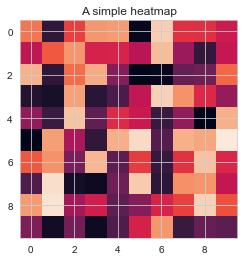

In [18]:
plt.imshow(arr1)
plt.title('A simple heatmap')

# Saving the image
utils.save_mpl(1)

plt.show()

### Creating colorbar

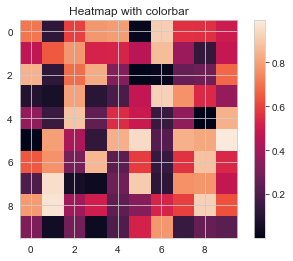

In [22]:
# Getting a hold of the axes object
ax = plt.gca()
# Creating the heatmap
im = plt.imshow(arr1)
# Creating the colorbar
ax.figure.colorbar(im, ax=ax)

plt.title('Heatmap with colorbar')

# Saving the image
utils.save_mpl(2)

plt.show()

### Trying out different cmaps

Find more cmaps in this [link](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

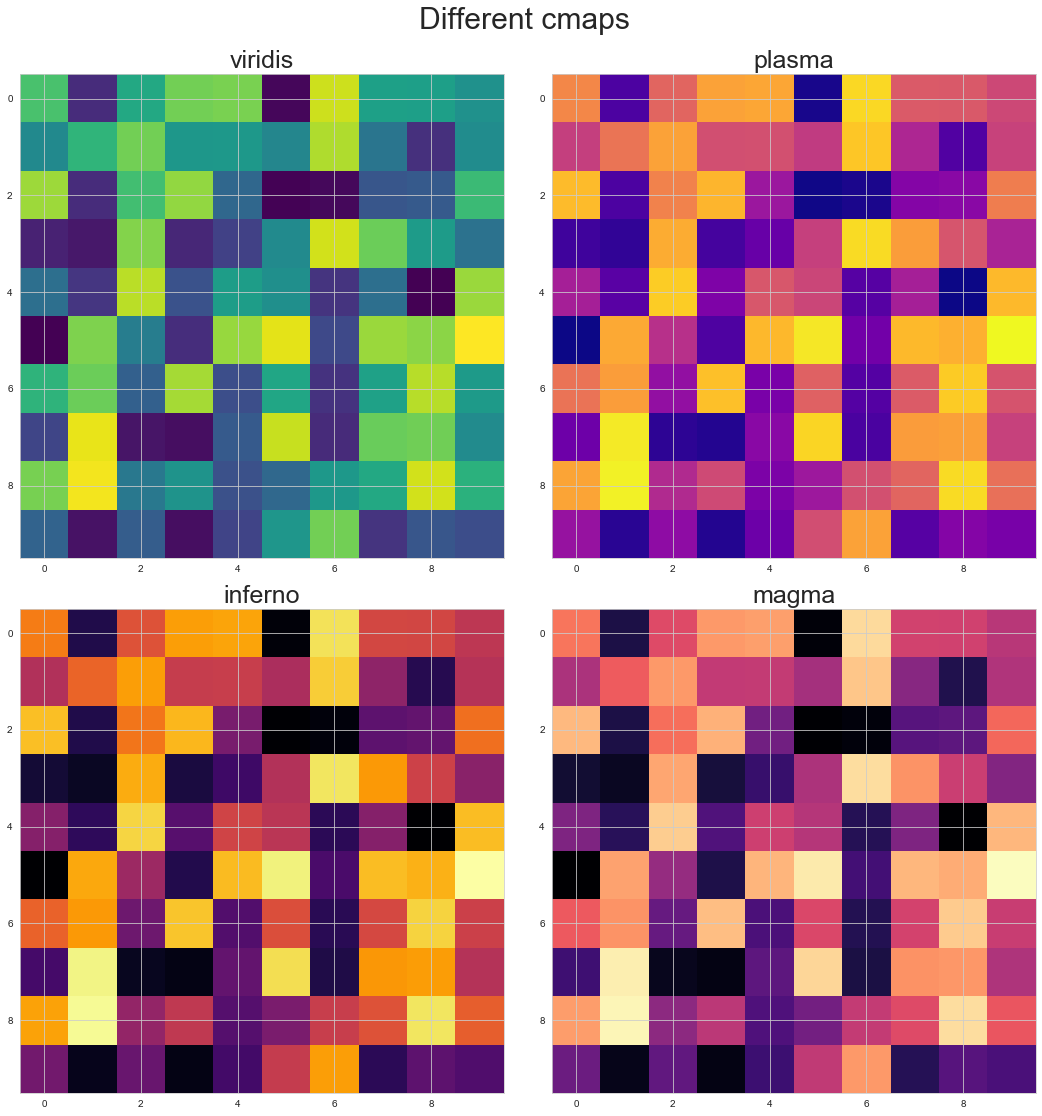

In [36]:
cmaps = ['viridis', 'plasma', 'inferno', 'magma']

_, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

idx = 0

for i in range(2):
    for j in range(2):
        ax[i][j].imshow(arr1, cmap=cmaps[idx])
        ax[i][j].set_title(cmaps[idx], fontsize=25)
        idx += 1

plt.tight_layout()
plt.suptitle('Different cmaps', fontsize=30, x=.5, y=1.03)

# Saving the image
utils.save_mpl(3)

plt.show()

### Using the interpolation on the heatmap

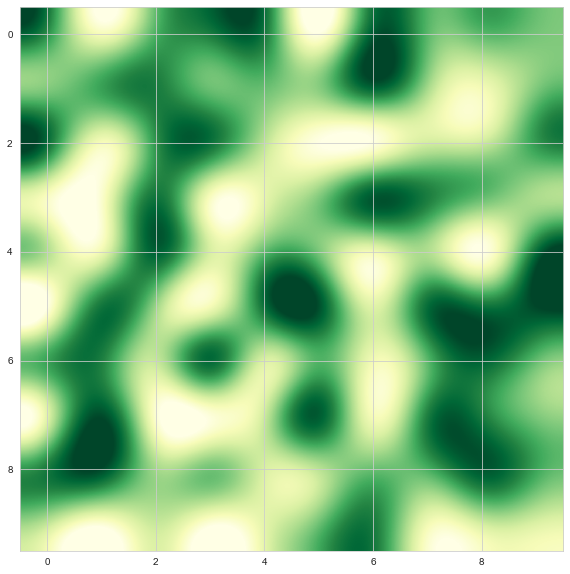

In [72]:
plt.figure(figsize=(10, 10))
ax = plt.gca()

im = ax.imshow(arr1, cmap='YlGn', interpolation='lanczos')


Showing the rest of the interpolation methods...

In [123]:
interpolations = [
    'bilinear', 'bicubic', 'spline16', 
    'spline36', 'hanning', 'hamming', 
    'hermite', 'kaiser', 'quadric', 
    'catrom', 'gaussian', 'bessel',
    'mitchell', 'sinc', 'lanczos'
]

In [137]:
import matplotlib as mpl

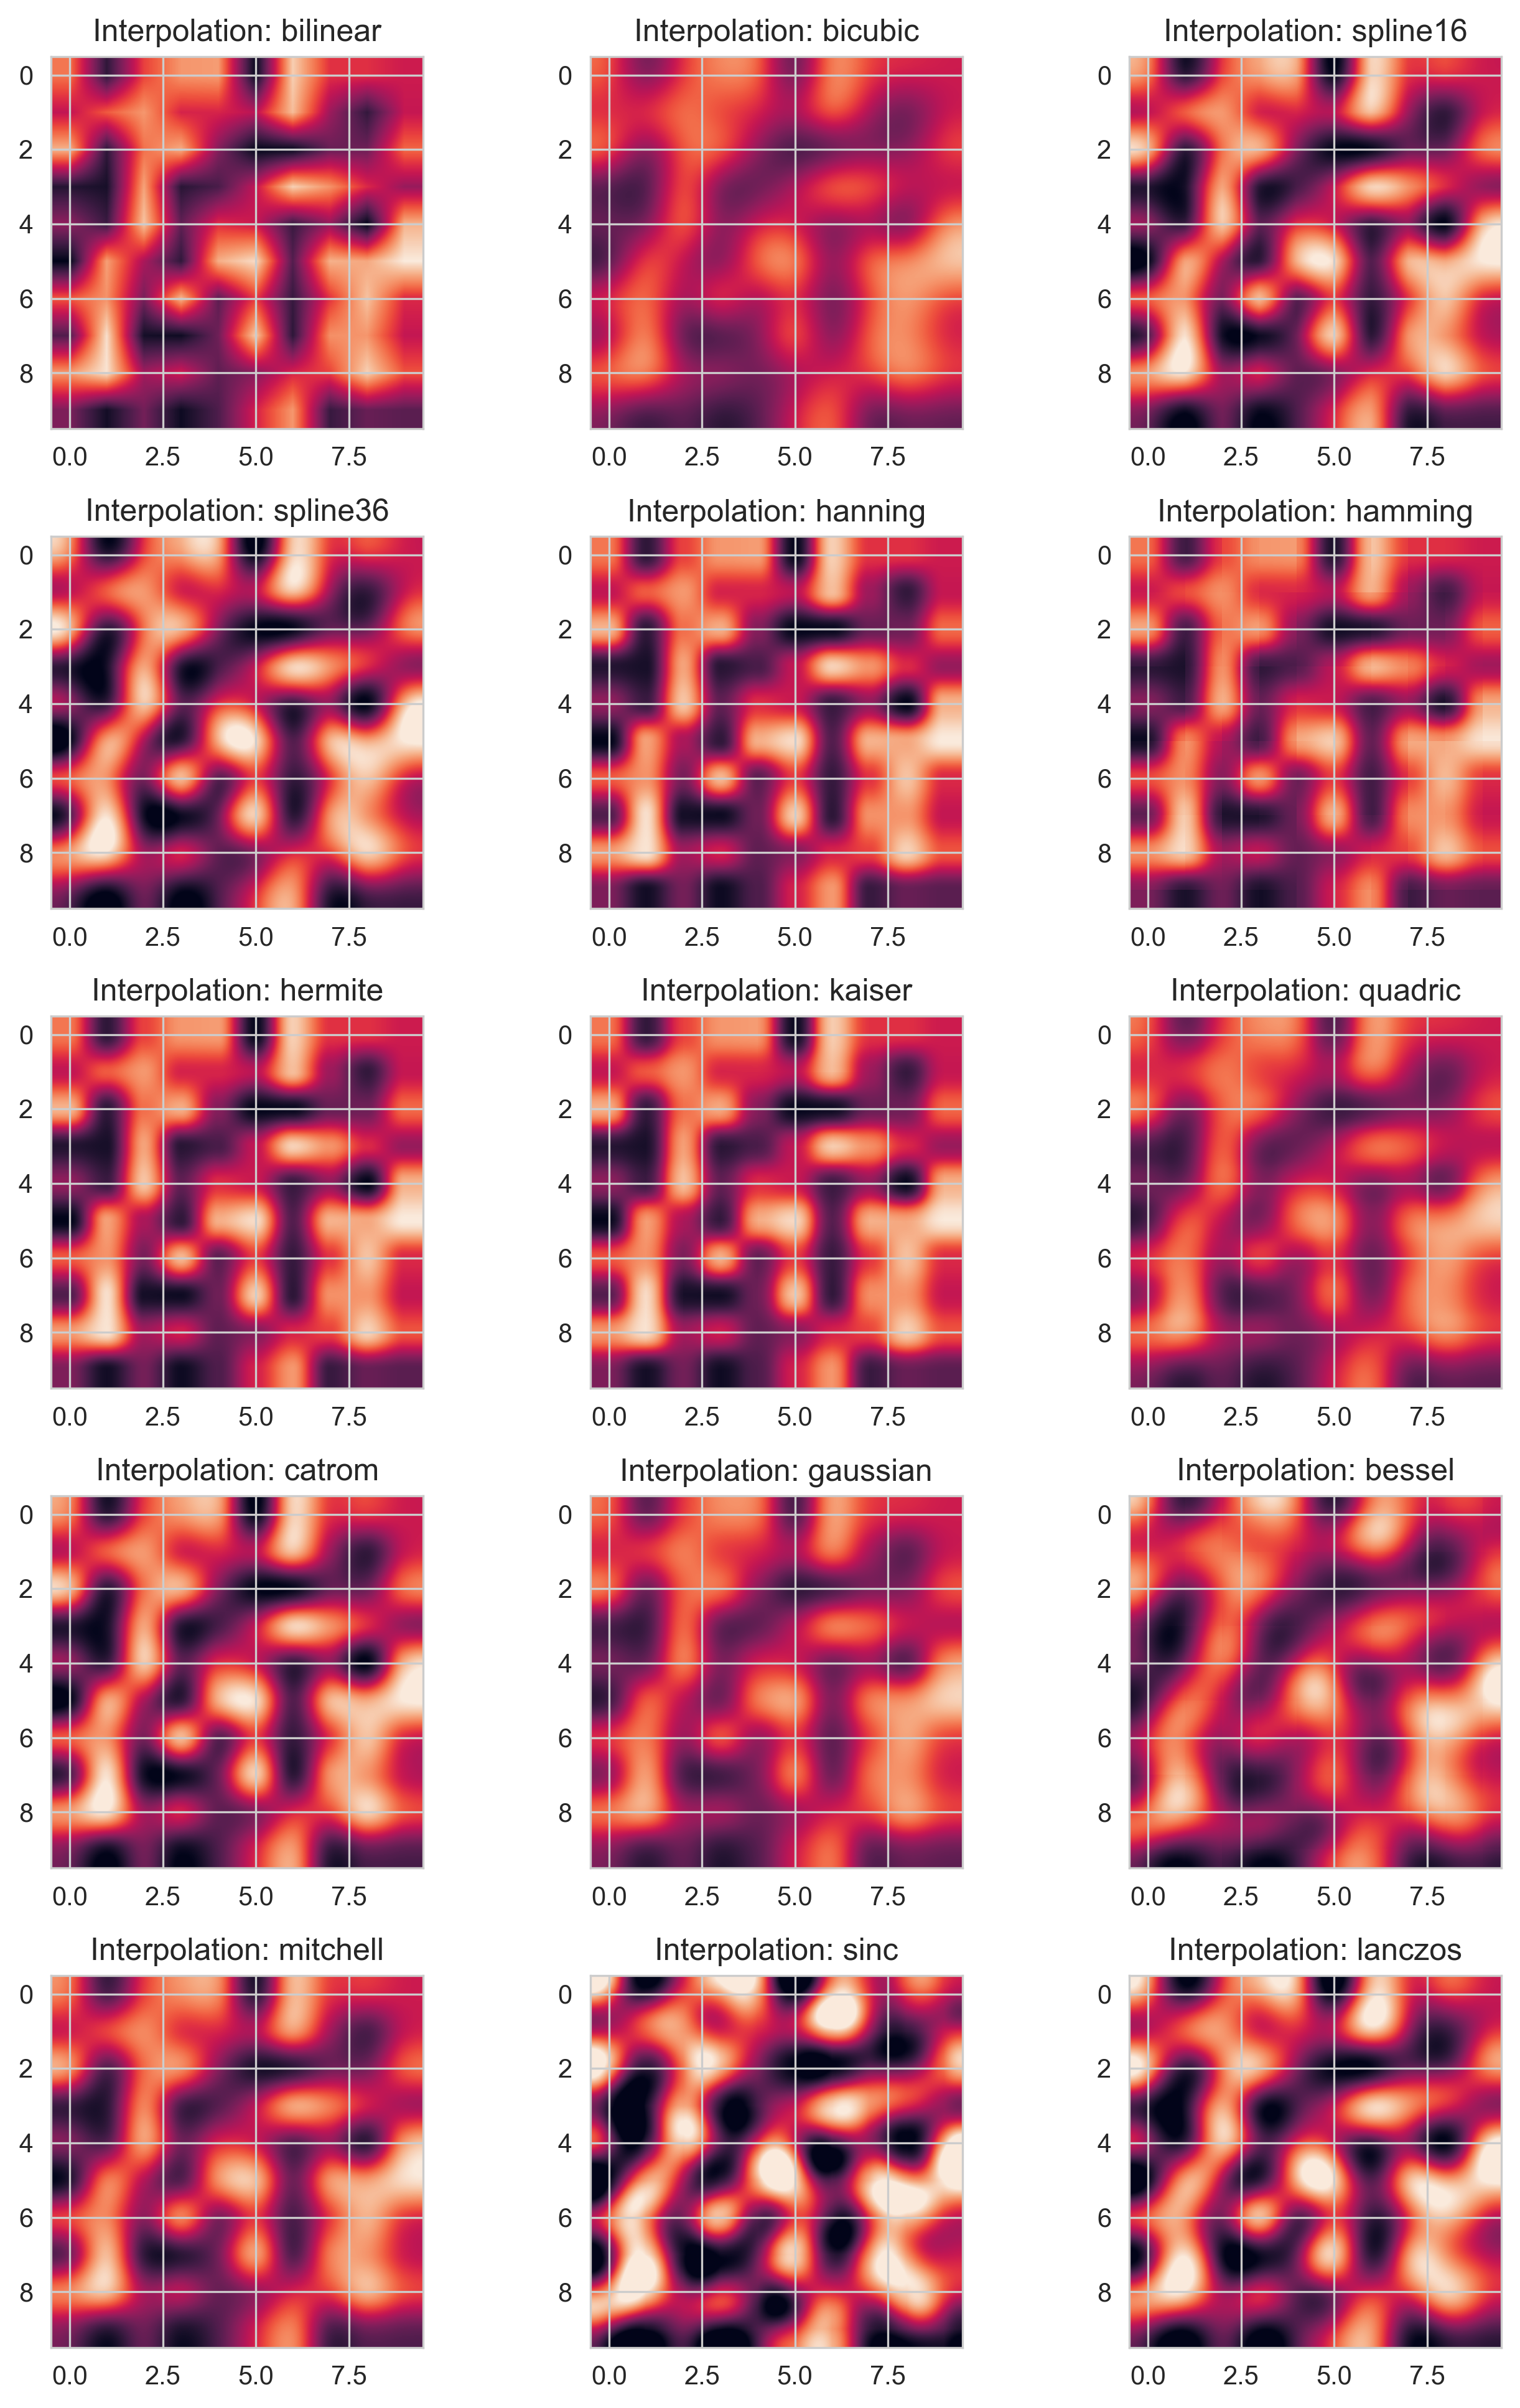

In [143]:
fig = plt.figure(figsize=(9, 13), dpi=300)
axes = []
idx = 1

for i in range(5):
    for j in range(3):
        axes.append(
            fig.add_subplot(5, 3, idx)
        )
        idx += 1

idx = 0
r = fig.canvas.get_renderer()
for a in axes:
    a.imshow(arr1, interpolation=interpolations[idx])
    a.set_title(f'Interpolation: {interpolations[idx]}')

    # Next interpolation
    idx += 1

plt.tight_layout()

idx=0
for a in axes:
    # Saving individual subplots
    extent = a.get_tightbbox(r).transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(f'../gallery/Heatmap/{interpolations[idx]}.png', bbox_inches=extent)
    idx += 1

plt.show()